In [1]:
from google.colab import files
data=files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df=pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


** Task 1. Director's Impact on Gross Earnings: Analyze how movies directed by different directors**
# perform in terms of gross earnings. Are there any noticeable trends or patterns?**bold text**

In [32]:
df['Director'].nunique()

548

In [23]:
director_gross = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)
#top 10
# Convert the result to a DataFrame for simplicity
df_director_gross = pd.DataFrame({'Director': director_gross.index, 'Average_Gross': director_gross.values})
df_director_gross

,Director,Average_Gross
0,Anthony Russo,5.512599e+08
1,Gareth Edwards,5.321773e+08
2,J.J. Abrams,4.743903e+08
3,Josh Cooley,4.340380e+08
4,Roger Allers,4.227838e+08
5,Tim Miller,3.630707e+08
6,James Gunn,3.614949e+08
7,James Cameron,3.496473e+08
8,Byron Howard,3.412682e+08
9,David Yates,3.263179e+08


## Task 2:  Other Potential Analyses:
 i)  Genre popularity over the years

In [35]:

# Group the data by year and calculate the total number of movies/TV shows each year
total_movies_per_year = df.groupby('Release_Year').size()
total_movies_per_year

Release_Year
1920.0     1
1921.0     1
1922.0     1
1924.0     1
1925.0     2
          ..
2016.0    28
2017.0    22
2018.0    19
2019.0    23
2020.0     6
Length: 99, dtype: int64

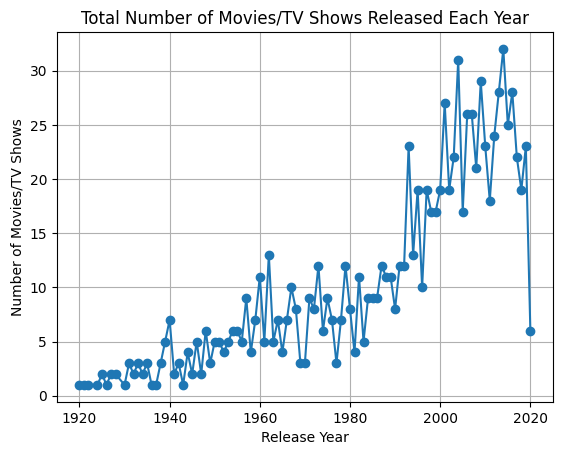

In [29]:

# Plot the total number of movies/TV shows released each year
total_movies_per_year.plot(kind='line', marker='o')
plt.title('Total Number of Movies/TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.grid(True)
plt.show()


ii) Correlation between IMDB ratings and commercial success.

In [33]:

# Calculate the correlation between IMDB ratings and gross earnings
correlation = df['IMDB_Rating'].corr(df['Gross'])
correlation

0.09592277110132356

iii) Impact of movie length on ratings or earnings.


In [43]:
#removing min
Duration= df['Runtime'].str.split(' ', expand=True)[0].astype(float)
Duration

0      142.0
1      175.0
2      152.0
3      202.0
4       96.0
       ...  
995    115.0
996    201.0
997    118.0
998     97.0
999     86.0
Name: 0, Length: 1000, dtype: float64

In [45]:
correlation_ratings = df['Duration'].corr(df['IMDB_Rating'])
correlation_ratings

0.24309589775419407

In [46]:
correlation_earnings = df['Duration'].corr(df['Gross'])
correlation_earnings

0.13967069065697754